# Camera

Kevin J. Walchko created 27 July 2017

----

Let's go over our first robotic sensor that we will use in this course. It is an important sensor and we will only have time to just scratch the surface.

## References

- [This was heavily influenced by Scott](tbd)

## Setup

In [2]:
%matplotlib inline 

In [3]:
from __future__ import print_function, division
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks

<img src="./images/output-1.png" />

<img src="./images/output-2.png" />

<img src="./images/output-4.png" />

<img src="./images/output-5.png" />

<img src="./images/output-6.png" />

<img src="./images/output-7.png" />

<img src="./images/output-9.png" />

# Basic

Now let's grab an image ... jupyter wasn't made for grabbing video, but later we can cheat a little and do it.

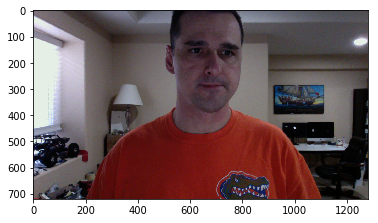

In [4]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
if ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)

cap.release()

In [ ]:
# create a map to keep track of all these names
prop_map = {
    "pos_msec":cv2.CAP_PROP_POS_MSEC,
    "pos_frame":cv2.CAP_PROP_POS_FRAMES,
    "avi_ratio":cv2.CAP_PROP_POS_AVI_RATIO ,
    "width":cv2.CAP_PROP_FRAME_WIDTH ,
    "height":cv2.CAP_PROP_FRAME_HEIGHT ,
    "fps":cv2.CAP_PROP_FPS ,
    "fourcc":cv2.CAP_PROP_FOURCC ,
    "frame_count":cv2.CAP_PROP_FRAME_COUNT,
    "format":cv2.CAP_PROP_FORMAT ,
    "mode":cv2.CAP_PROP_MODE ,
    "brightness":cv2.CAP_PROP_BRIGHTNESS ,
    "contrast":cv2.CAP_PROP_CONTRAST ,
    "saturation":cv2.CAP_PROP_SATURATION,
    "hue":cv2.CAP_PROP_HUE ,
    "gain":cv2.CAP_PROP_GAIN ,
    "exposure":cv2.CAP_PROP_EXPOSURE ,
    "convert_rgb":cv2.CAP_PROP_CONVERT_RGB ,
 #   "white_balance":cv2.cv.CV_CAP_PROP_WHITE_BALANCE ,
    "rectification":cv2.CAP_PROP_RECTIFICATION}

# get a camera property
def get_prop(cam,name,prop_map):
    return cam.get(prop_map[name])

# set a camera property
def set_prop(cam,name,prop_map,value):
    cam.set(prop_map[name],value)

# print out all of the properites
def poll_props(cam,prop_map):
    out_map = {}
    for k,v in prop_map.items():
        result = cam.get(v)
        if( result == -1.0 ):
            out_map[k] = None
        else:
            out_map[k] = result
    return out_map

# create a camera and get its property
cam = cv2.VideoCapture(0)
properties = poll_props(cam,prop_map)

images = []

# list our properties
for k,v in properties.items():
    print("{0:<12}\t:{1:<12}".format(k,v))

while(True):
    # toggle properties and get results. 
    sat = get_prop(cam,"saturation",prop_map)
    if( sat > 0.5 ):
        set_prop(cam,"saturation",prop_map,0.1)
    else:
        set_prop(cam,"saturation",prop_map,1.0)
    time.sleep(0.05)
    ret, frame = cam.read()
#     cv2.imshow('Basic Web Cam',frame)
    if ret:
        images.append(frame)

# put our toys back on the shelf 
cam.release()

hue         	:0.0         
saturation  	:0.0         
format      	:16.0        
brightness  	:0.0         
pos_frame   	:0.0         
convert_rgb 	:0.0         
rectification	:0.0         
height      	:720.0       
contrast    	:0.0         
width       	:1280.0      
pos_msec    	:0.0         
fps         	:29.97002997 
fourcc      	:0.0         
mode        	:0.0         
avi_ratio   	:0.0         
frame_count 	:0.0         
gain        	:0.0         
exposure    	:0.0         


## Grab Video

## Save Video

## Save Images ... or earlier?

# Data Sets

You don't always want to work on live images straight from a camera or you want to have a standard setup of images everyone can test their algorithms against. Here is a short list of some of the image sets available:

* [KITTI Vision Benchmark](http://www.cvlibs.net/datasets/kitti/index.php)
* [Amsterdam Library of Objects Database](http://staff.science.uva.nl/~aloi/)
* [Washington University](http://www.cs.washington.edu/research/imagedatabase/groundtruth/_tars.for.download/)
* [Caltech Computational Vision Archive](http://www.vision.caltech.edu/html-files/archive.html)
* [University of Southern California](http://sipi.usc.edu/database/database.php)
* [Huge List of many various types of image libraries](http://www.cs.cmu.edu/~cil/v-images.html)
* [Big list of mammography images](http://marathon.csee.usf.edu/Mammography/Database.html)
* [Very popular videos for detecting features](http://itee.uq.edu.au/~shenht/UQ_VIDEO/)
* [LFW Face Database](http://vis-www.cs.umass.edu/lfw/)
* [Caltech 101 Dataset](http://www.vision.caltech.edu/Image_Datasets/Caltech101/)
* [PASCAL Object Recognition Database Collection](http://pascallin.ecs.soton.ac.uk/challenges/VOC/databases.html) -- great data set. 
* [LabelMe](http://labelme.csail.mit.edu/Release3.0/)
* [ImageNet](http://www.image-net.org/)
* [Caltech 256](http://www.vision.caltech.edu/Image_Datasets/Caltech256/)
* [CIFAR 10 / CIFAR 100](http://www.cs.utoronto.ca/~kriz/cifar.html)
* [Standford Background](http://dags.stanford.edu/projects/scenedataset.html)
* [NYU Depth dataset](http://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html)
* [SiftFlow Dataset](http://www.cs.unc.edu/~jtighe/Papers/ECCV10/)
* [SUN Image Database](http://groups.csail.mit.edu/vision/SUN/)
* [MIT Indoor Scene Dataset](http://web.mit.edu/torralba/www/indoor.html)
* [Robotic 3D Scan Dataset](http://kos.informatik.uni-osnabrueck.de/3Dscans/)
* [Technical University Graz has a nice collection.](http://www.icg.tugraz.at/Members/hayko/dataset-overview)
* [Kylberg Texture Dataset](http://www.cb.uu.se/~gustaf/texture/)
* [Street View House Numbers](http://ufldl.stanford.edu/housenumbers/)
* [Print Art - Art library for computer vision](http://printart.isr.ist.utl.pt/)


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.